In [18]:
import scipy.stats as st
import numpy as np
import math
import matplotlib.pyplot as plt

teta0 = -7
teta1 = -1
teta2 = -5
teta3 = 0.04
sigma = 2.4
m = 0
n = 40
X0 = np.zeros(n)
Y = np.zeros(n)
Phi = np.zeros(n)

norm_osh = [-1.18035343,  1.24490342,  1.34657022, -1.99904991, -1.66204156,  0.99093447,
 -2.09525416,  0.21915512, -2.35776065,  0.17109776, -0.27851803, -0.51242678,
  0.84359256,  0.61392331, -1.35806172,  0.69021629,  0.73124708, -0.07883357,
 -2.63623179,  0.87630316, -0.73489835, -0.68539738, -0.43862397, -1.53844957,
  1.1322506,   1.0902197,   3.59298842,  0.819523,   -0.60547608,  1.49143068,
  4.06820745, -0.92375956,  0.05674103, -1.95842462,  2.31928375, -0.96267219,
 -0.87512711,  2.11249617, -1.76851047,  1.03904096]

for k in range(n):
    X0[k] = -4 + 0.2 * (k + 1)
    Phi[k] = teta0 + teta1 * X0[k] + teta2 * (X0[k] ** 2) + teta3 * (X0[k] ** 3)
    Y[k] = teta0 + teta1 * X0[k] + teta2 * (X0[k] ** 2) + teta3 * (X0[k] ** 3) + norm_osh[k]

TY = st.t.ppf(0.975, n - (m + 1)) + 1


while abs(TY) > st.t.ppf(0.975, n - m - 1):
    X = np.zeros((n, m + 1))
    for i in range(n):
        for j in range(m + 1):
            X[i][j] = X0[i] ** j
         
    teta_roof = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), Y)
    alpha = np.linalg.inv(np.matmul(np.transpose(X), X))[-1][-1]
    E = Y - np.matmul(X, teta_roof)
    E_norm = np.sqrt(np.matmul(np.transpose(E), E))
    TY = np.sqrt(teta_roof[-1] ** 2 * (n - m - 1)) / (alpha * E_norm ** 2)
    m += 1  
m -= 1

print('m =', m)
print('tetta =', teta_roof[m])


m = 0
tetta = -33.715993643750004


In [19]:
left95 = []
right95 = []

t = st.t.ppf(0.975, n - m - 1)
D = np.transpose(E).dot(E) / (n - m - 1)

for i in range(m + 1):
    left95.append(teta_roof[i] - t * np.sqrt(D * alpha))
    right95.append(teta_roof[i] + t * np.sqrt(D * alpha))

print('Доверительный интервал 0,95 = [{}, {}]'.format(left95[i], right95[i]))

Доверительный интервал 0,95 = [-41.52734550486737, -25.904641782632638]


In [20]:
left99 = []
right99 = []

t = st.t.ppf(0.995, n - m - 1) 

for i in range(m + 1):
    left99.append(teta_roof[i] - t * np.sqrt(D * alpha))
    right99.append(teta_roof[i] + t * np.sqrt(D * alpha))

print('Доверительный интервал 0,99 = [{}, {}]'.format(left99[i], right99[i]))

Доверительный интервал 0,99 = [-44.17357891448904, -23.258408373010962]


In [26]:
left_pol_95 = np.zeros(n)
right_pol_95 = np.zeros(n)
YP = np.zeros(n) 
u95 = st.norm.ppf(1 - 0.05 / 2)

for i in range(n):
    for j in range(m + 1):
        YP[i] += teta_roof[j] * (X[i] ** j)


for j in range(n):
    left_pol_95[j] = YP[j] - u95 * np.sqrt(D * (X[j].dot(np.linalg.inv(np.transpose(X).dot(X)))).dot(np.transpose(X[j])))
    right_pol_95[j] = YP[j] + u95 * np.sqrt(D * (X[j].dot(np.linalg.inv(np.transpose(X).dot(X)))).dot(np.transpose(X[j])))

print('Доверительные интервалы уровня надежности 0,95 = [{}, {}]'.format(left_pol_95[i], right_pol_95[i]))

Доверительные интервалы уровня надежности 0,95 = [-41.28510280894105, -26.14688447855896]


In [27]:
left_pol_99 = np.zeros(n)
right_pol_99 = np.zeros(n)
u99 = st.norm.ppf(1 - 0.01 / 2)


for j in range(n):
    left_pol_99[j] = YP[j] - u99 * np.sqrt(D * (X[j].dot(np.linalg.inv(np.transpose(X).dot(X)))).dot(np.transpose(X[j])))
    right_pol_99[j] = YP[j] + u99 * np.sqrt(D * (X[j].dot(np.linalg.inv(np.transpose(X).dot(X)))).dot(np.transpose(X[j])))

print('Доверительные интервалы уровня надежности 0,99 = [{}, {}]'.format(left_pol_99[i], right_pol_99[i]))

Доверительные интервалы уровня надежности 0,99 = [-43.663489283081844, -23.768498004418163]


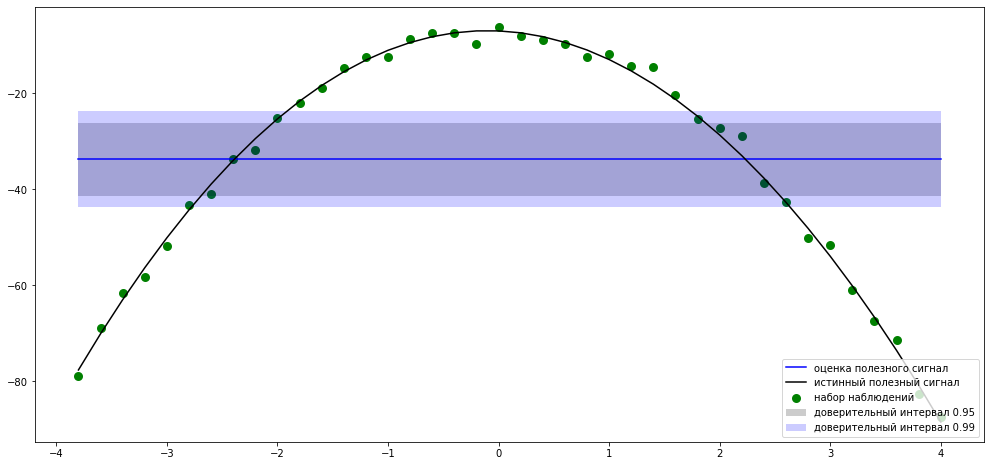

In [28]:
plt.figure(figsize=(17, 8))
plt.scatter(X0.tolist(), Y.tolist(), color='green', label='набор наблюдений', linewidth=3)
plt.plot(X0.tolist(), YP.tolist(), color='blue', label='оценка полезного сигнал')
plt.plot(X0.tolist(), Phi.tolist(), color='black', label='истинный полезный сигнал')

plt.fill_between(X0.tolist(), left_pol_95.tolist(), right_pol_95.tolist(), facecolor='black', alpha=0.2, label='доверительный интервал 0.95')
plt.fill_between(X0.tolist(), left_pol_99.tolist(), right_pol_99.tolist(), facecolor='blue', alpha=0.2, label='доверительный интервал 0.99')

plt.legend(loc='lower right')
plt.show()


Максимум = 27.592296803750003, минимум = -53.68496539625
delta = 13.546210366666665
Точки разбиения: [-53.6849654  -40.13875503 -26.59254466 -13.0463343    0.49987607
  14.04608644  27.5922968 ]
Количество ошибок в каждом промежутке: [ 3.  5.  4.  5.  8. 15.]
Значения dest:  [0.0055366  0.00922767 0.00738214 0.00922767 0.01476428 0.02768302]


Text(0.5, 1.0, 'Гистограмма оценки плотности распределения случайной ошибки наблюдения')

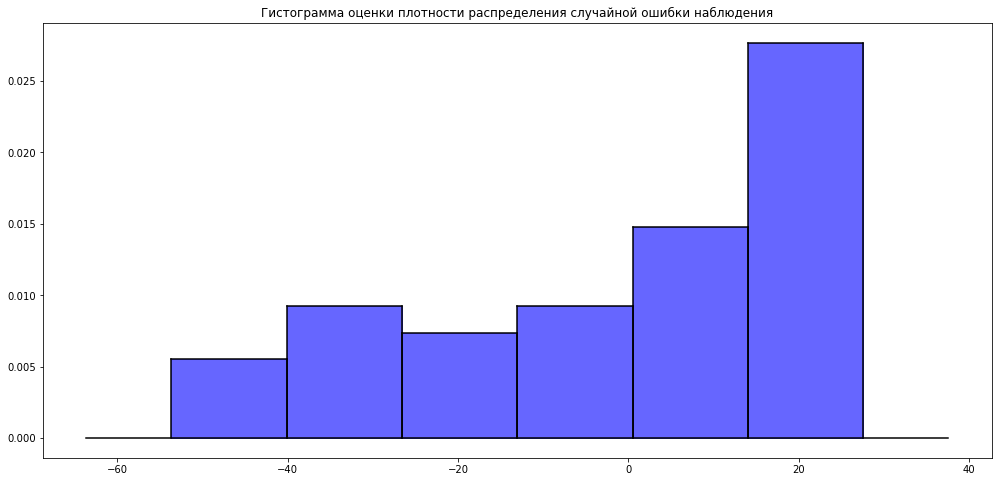

In [29]:
l = round(np.sqrt(n)) 
delta = (max(E) - min(E)) / l
count = np.zeros(l)
dest = np.zeros(l)
t = np.zeros(l + 1)
t[0] = min(E)

for i in range(l):
    t[i + 1] = min(E) + (i + 1) * delta

for i in range(n):
    for j in range(l):
        if (min(E) + j * delta) <= E[i] < (min(E) + (j + 1) * delta):
            count[j] += 1
count[-2] += 1

for i in range(l):
    dest[i] = count[i] / (n * delta)
    
print("Максимум = {}, минимум = {}".format(max(E), min(E)))
print("delta =", delta)
print("Точки разбиения:", t)
print("Количество ошибок в каждом промежутке:", count)
print("Значения dest: ", dest)

    
fig, ax = plt.subplots(figsize=(17, 8))
for i in range(l):
    ax.plot([min(E) + i * delta, min(E) + i * delta], [0, dest[i]], c='black')
    ax.plot([min(E) + i * delta, min(E) + (i + 1) * delta], [dest[i], dest[i]], c='black')
    ax.plot([min(E) + (i + 1) * delta, min(E) + (i + 1) * delta], [dest[i], 0], c='black')
    o = [t[i], t[i], t[i+1], t[i+1]]
    w = [0, dest[i], dest[i], 0]
    ax.fill(o, w, color='blue', alpha=0.6)
ax.plot([min(E) - 10, max(E) + 10], [0, 0], c='black')
plt.title('Гистограмма оценки плотности распределения случайной ошибки наблюдения')

In [10]:
D = np.transpose(E).dot(E) / (n - m - 1)
print('Оценка дисперсии случайных ошибок:', D)

Оценка дисперсии случайных ошибок: 596.5589243955701


In [11]:
s = 1
p = np.zeros(l + 2) 
mean = np.mean(E)

p[0] = st.norm.cdf((t[0] - mean) / np.sqrt(D))
p[-1] = 1 - st.norm.cdf((t[-1] - mean) / np.sqrt(D))

for i in range(1, l + 1):
    p[i] = st.norm.cdf((t[i] - mean) / np.sqrt(D)) - st.norm.cdf((t[i - 1] - mean) / np.sqrt(D))

Z = n * p[0] + n * p[-1] 
for i in range(1, l + 1): 
    Z += ((count[i - 1] - n * p[i]) ** 2 / (n * p[i])) 
    
if 0 <= Z <= st.chi2.ppf(0.95, l + 1 - s):
    print("Z = {} принадлежит доверительной области G = [0, {}]".format(Z, st.chi2.ppf(0.95, l + 1 - s)))
    print("Н0 принимается")
else:
    print("Z = {} не принадлежит доверительной области G = [0, {}]".format(Z, st.chi2.ppf(0.95, l + 1 - s)))
    print("Н0 отвергается")


Z = 23.138208098572342 не принадлежит доверительной области G = [0, 12.591587243743977]
Н0 отвергается
